In [6]:
import xml.etree.ElementTree as ET
import numpy as np
from pathlib import Path
import cv2
import os
from matplotlib import pyplot as plt

In [7]:
def xml_to_record(xml_file, height_resize=1, width_resize=1):
    tree = ET.parse(xml_file)
    for cur_object in tree.findall('object'):
        if cur_object.find('deleted').text=="1":
            continue
        object_name = cur_object.find('name').text
        if object_name=="bp":
            all_polys = []
            for cur_poly in cur_object.findall('polygon'):
                cur_poly_pts = []
                for cur_pt in cur_poly.findall('pt'):
                    cur_poly_pts.append([int(cur_pt.find('x').text)*width_resize,
                                         int(cur_pt.find('y').text)*height_resize])
                all_polys.append(cur_poly_pts)
            return np.array(all_polys, dtype=np.int32)
    return None

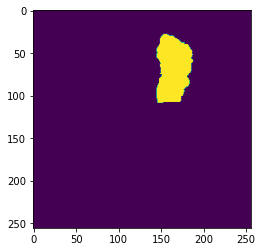

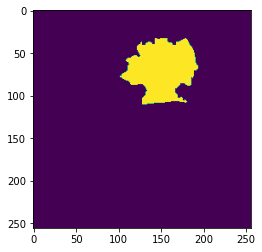

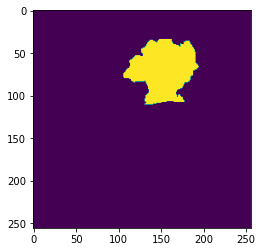

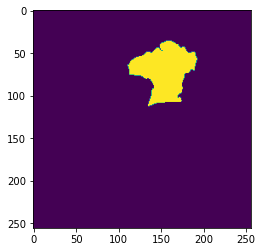

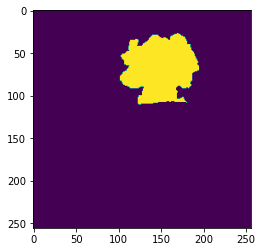

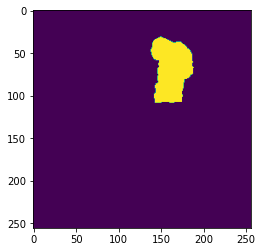

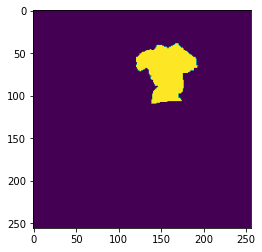

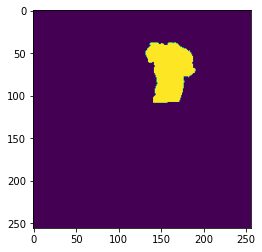

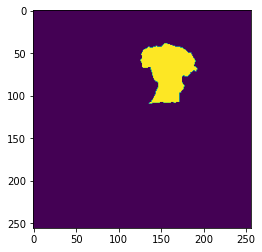

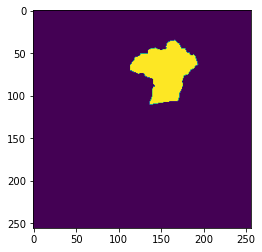

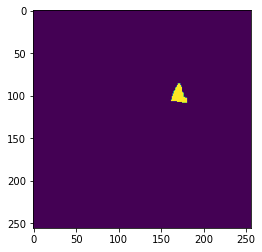

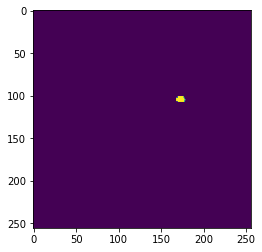

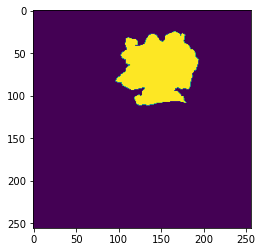

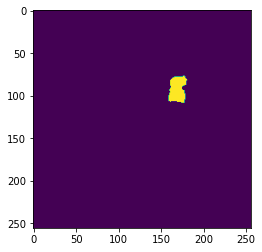

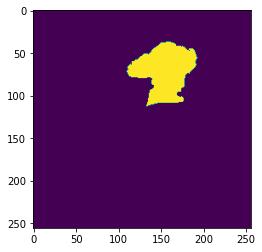

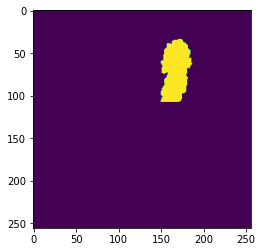

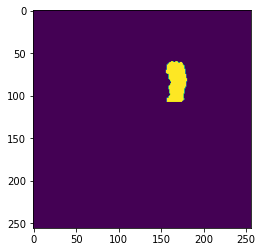

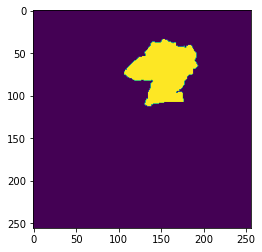

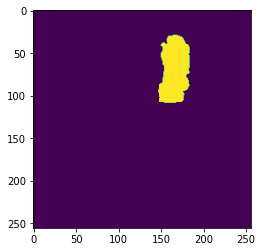

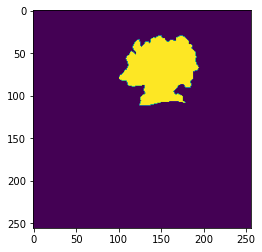

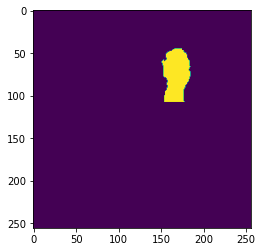

In [15]:
mask_dict = {}
valid_imgs = []
resized_image_dimensions = (256, 256)
data_path = Path('/userdata/kerasData/segmentation-smoke-detect/unet/data/smer')
for cur_xml in (data_path/"xml").glob('*.xml'):
    img_name, ext = cur_xml.with_suffix(".jpg").name.split('.')
    img_name = img_name+'_image.'+ext
    img_file = str(data_path/"images"/img_name)
    raw_img = cv2.imread(img_file)
    height_resize = resized_image_dimensions[0] / raw_img.shape[0]
    width_resize = resized_image_dimensions[1] / raw_img.shape[1]
    cur_polygon_mask = xml_to_record(cur_xml, height_resize, width_resize)
    if cur_polygon_mask is not None:
        mask_img = np.zeros(resized_image_dimensions, dtype=np.uint8)
        cv2.fillPoly(mask_img, cur_polygon_mask, 255)
        np.save(os.join(data_path cur_xml.split('.')[0]+'_mask', mask_img)
        mask_dict[img_file] = mask_img
        valid_imgs.append(img_file)
        plt.imshow(mask_img)
        plt.show()

In [20]:
for mask in os.listdir('data/smer/masks'):
    name, dlt, ext = mask.split('.')
    os.rename('data/smer/masks/'+mask, 'data/smer/masks/'+name+'.'+ext)

In [4]:
len(os.listdir('data/smer/xml'))

22